In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn

X.shape: (26, 2)


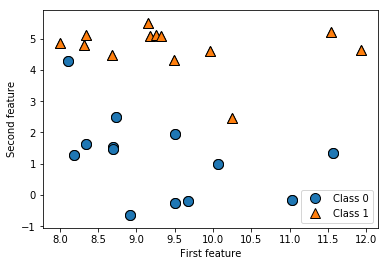

In [3]:
# 資料及生成
X, y = mglearn.datasets.make_forge()
# 繪製資料集
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))
plt.show()

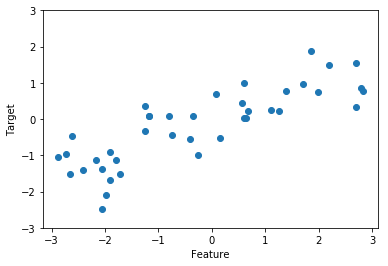

In [5]:
# wave datasets
X, y = mglearn.datasets.make_wave(n_samples=40)  # wave shape
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

In [7]:
# 判斷癌症
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [10]:
print("癌症資料的形狀： {}".format(cancer.data.shape))
print(("簡單計數每個類別：\n{}".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})))

癌症資料的形狀： (569, 30)
簡單計數每個類別：
{'malignant': 212, 'benign': 357}


In [11]:
print("特徵名稱：\n{}".format(cancer.feature_names))

特徵名稱：
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [12]:
# 波士頓買賣房屋資料
from sklearn.datasets import load_boston
boston = load_boston()
print("資料形狀： {}".format(boston.data.shape))

資料形狀： (506, 13)


In [13]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))   # 506 simples, 104 features

X.shape: (506, 104)


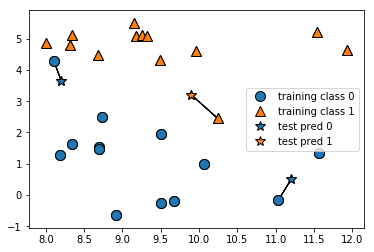

In [15]:
'''
KNN
'''
mglearn.plots.plot_knn_classification(n_neighbors=1)  # only one neighbors
plt.show()

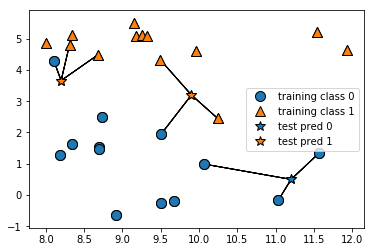

In [17]:
mglearn.plots.plot_knn_classification(n_neighbors=3)  # three neighbors
plt.show()

In [18]:
# split train and test datasets
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [21]:
# search for three near points
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [25]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [26]:
print("Test set prediction: {}".format(clf.predict(X_test)))  # 計算鄰近點

Test set prediction: [1 0 1 0 1 0 0]


In [27]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))  # call score, about 86% accuracy

Test set accuracy: 0.86


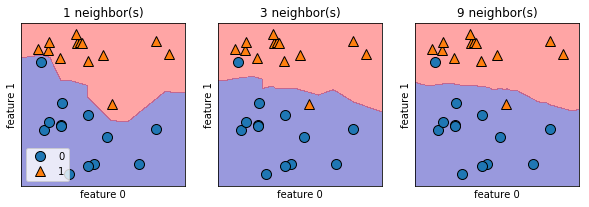

In [32]:
# 分析 KNeighborsClassifier
# 判斷邊界 (decision boundary)
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 函式會回傳物件本身，所以可以只用一行就將它實例化
    # 同時 fit
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)
plt.show()

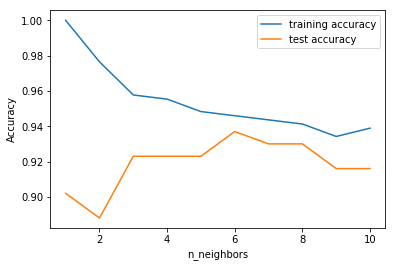

In [36]:
# split datasets
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 由 1 到 10 的值設定 n_neighbors
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 建立模型
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 紀錄訓練集的準確度值
    training_accuracy.append(clf.score(X_train, y_train))
    # 記錄歸納準確度的值
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

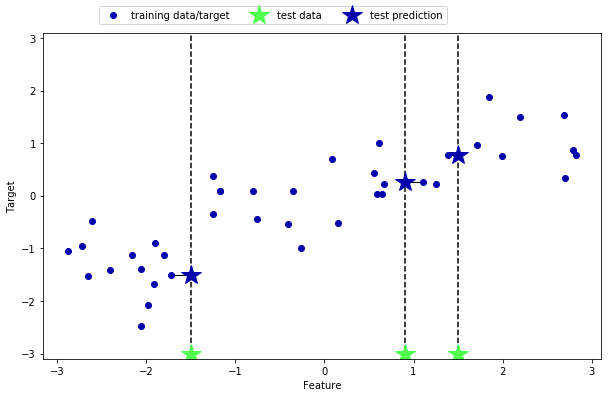

In [40]:
# k-鄰近點迴歸
# wave data use to one neighbors
mglearn.plots.plot_knn_regression(n_neighbors=1)
plt.show()

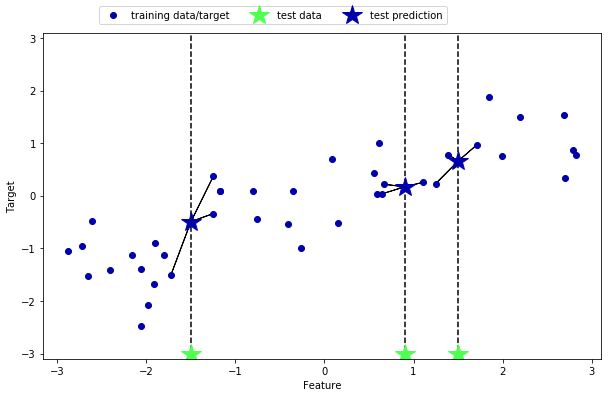

In [42]:
# wave data use to three neighbors
mglearn.plots.plot_knn_regression(n_neighbors=3)
plt.show()

In [44]:
from sklearn.neighbors import KNeighborsRegressor
X,y = mglearn.datasets.make_wave(n_samples=40)

# 將波形資料集分成一個訓練集和一個測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 將模型實例化並設定鄰近點的數量為3
reg = KNeighborsRegressor(n_neighbors=3)
# 用訓練資料和它的目標標籤來 fit 模型
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [50]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [51]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


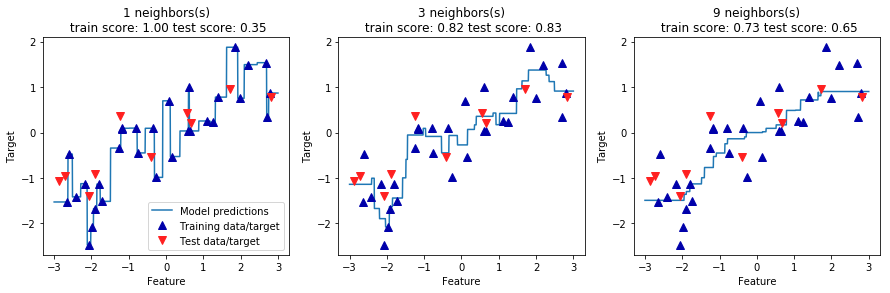

In [55]:
# 分析 KNeighborsRegressor
# 建立一條件包含所有點的測試資料集
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# 建立1,000資料點，均勻地散佈在 -3 和 3 之間
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 用 1, 3 或 9 個鄰近點來做預測
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "{} neighbors(s)\n train score: {:.2f} test score: {:.2f}".format(
        n_neighbors, reg.score(X_train, y_train),
        reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
               "Test data/target"], loc="best")
plt.show()